In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import plot_confusion_matrix, compute_sparsity
from sklearn.cluster import KMeans
from ucimlrepo import fetch_ucirepo
from convex_nmf import convex_nmf
from sklearn.metrics import accuracy_score

In [2]:
# fetch dataset 
ionosphere = fetch_ucirepo(id=52) 
  
# data (as pandas dataframes) 
X = ionosphere.data.features # num_samples x num_features
y = ionosphere.data.targets
y = [1 if label == 'g' else 0 for label in y['Class']]

In [3]:
kmeans_clustering_accuracies = []
random_state = 22
for i in range(50):
    kmeans = KMeans(n_clusters=2, tol = 0.001, random_state = random_state * i)
    kmeans_labels = kmeans.fit_predict(X)
    #plot_confusion_matrix(y_true = y, y_pred = kmeans_labels, normalize = True)
    accuracy = accuracy_score(y_true = y, y_pred = kmeans_labels)
    print(f"Total iterations for kmeans: {kmeans.n_iter_}. Accuracy on iteration {i}: {accuracy}")
    kmeans_clustering_accuracies.append(accuracy)

print(f'Average accuracy: {np.mean(kmeans_clustering_accuracies)}')

Total iterations for kmeans: 4. Accuracy on iteration 0: 0.7122507122507122
Total iterations for kmeans: 5. Accuracy on iteration 1: 0.2905982905982906
Total iterations for kmeans: 5. Accuracy on iteration 2: 0.28774928774928776
Total iterations for kmeans: 6. Accuracy on iteration 3: 0.28774928774928776
Total iterations for kmeans: 6. Accuracy on iteration 4: 0.7122507122507122
Total iterations for kmeans: 7. Accuracy on iteration 5: 0.2905982905982906
Total iterations for kmeans: 9. Accuracy on iteration 6: 0.28774928774928776
Total iterations for kmeans: 14. Accuracy on iteration 7: 0.28774928774928776
Total iterations for kmeans: 5. Accuracy on iteration 8: 0.7122507122507122
Total iterations for kmeans: 13. Accuracy on iteration 9: 0.7122507122507122
Total iterations for kmeans: 5. Accuracy on iteration 10: 0.2905982905982906
Total iterations for kmeans: 5. Accuracy on iteration 11: 0.7094017094017094
Total iterations for kmeans: 5. Accuracy on iteration 12: 0.28774928774928776
To

In [4]:
convex_nmf_clustering_accuracies = []
for i in range(0, 50):
    F, W, G_T, residual_vector = convex_nmf(X = np.array(X.T), r=2, tol=1e-4, max_iter=5000, random_state=random_state * i)
    G_T_sparse, num_non_zero_G = compute_sparsity(G_T)
    W_sparse, num_non_zero_W = compute_sparsity(W)
    print(f'Proportion of non-zero elements for G_T and W: {num_non_zero_G}, {num_non_zero_W}')
    convex_nmf_clusters = [0 if G_T[0, i] > G_T[1, i] else 1 for i in range(351)]
    #plot_confusion_matrix(y_true = y, y_pred = convex_nmf_clusters, normalize = True)
    accuracy = accuracy_score(y_true=y, y_pred=convex_nmf_clusters)
    print(f'Accuracy on iteration {i}: {accuracy}')
    convex_nmf_clustering_accuracies.append(accuracy)

print(f'Average accuracy: {np.mean(convex_nmf_clustering_accuracies)}')

  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  1%|          | 34/5000 [00:00<00:17, 276.64it/s]


Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 0: 0.6210826210826211


  1%|          | 34/5000 [00:00<00:13, 374.60it/s]


Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.0003553023703580548
Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 1: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  1%|          | 34/5000 [00:00<00:15, 328.76it/s]


Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 2: 0.3789173789173789


  0%|          | 19/5000 [00:00<00:26, 187.11it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:27, 180.83it/s]


Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 3: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  0%|          | 20/5000 [00:00<00:26, 191.05it/s]

Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159


  1%|          | 34/5000 [00:00<00:27, 182.29it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 4: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443


  0%|          | 19/5000 [00:00<00:26, 187.61it/s]

Relative error at iteration 20: 0.0003553023703580548


  1%|          | 34/5000 [00:00<00:27, 180.26it/s]

Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 5: 0.3789173789173789



  0%|          | 19/5000 [00:00<00:27, 181.22it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376


  1%|          | 34/5000 [00:00<00:27, 179.20it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 6: 0.3789173789173789


  0%|          | 19/5000 [00:00<00:26, 186.90it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376


  1%|          | 34/5000 [00:00<00:27, 179.25it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 7: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  0%|          | 21/5000 [00:00<00:24, 204.55it/s]

Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159


  1%|          | 34/5000 [00:00<00:26, 189.04it/s]

Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 8: 0.6210826210826211



  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616

  0%|          | 20/5000 [00:00<00:26, 187.30it/s]

  1%|          | 34/5000 [00:00<00:27, 181.42it/s]

Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...


Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 9: 0.6210826210826211


  1%|          | 26/5000 [00:00<00:19, 257.04it/s]

Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.0003553023703580548


  1%|          | 34/5000 [00:00<00:21, 228.80it/s]


Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 10: 0.3789173789173789


  0%|          | 19/5000 [00:00<00:26, 189.05it/s]

Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.00035530237035783755
Relative error at iteration 30: 0.00013011131771585487


  1%|          | 34/5000 [00:00<00:27, 183.88it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 11: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  0%|          | 19/5000 [00:00<00:26, 186.43it/s]

Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:27, 181.01it/s]

Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 12: 0.3789173789173789



  0%|          | 17/5000 [00:00<00:29, 169.30it/s]

Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.0003553023703580548
Relative error at iteration 30: 0.00013011131771585487


  1%|          | 34/5000 [00:00<00:25, 198.04it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 13: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443


  0%|          | 20/5000 [00:00<00:26, 189.17it/s]

Relative error at iteration 20: 0.00035530237035783755
Relative error at iteration 30: 0.00013011131771585487


  1%|          | 34/5000 [00:00<00:27, 178.40it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 14: 0.6210826210826211


  0%|          | 21/5000 [00:00<00:24, 205.71it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159


  1%|          | 34/5000 [00:00<00:27, 181.46it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 15: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  1%|          | 34/5000 [00:00<00:20, 243.65it/s]


Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 16: 0.3789173789173789


  1%|          | 33/5000 [00:00<00:15, 327.07it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159


  1%|          | 34/5000 [00:00<00:16, 302.00it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 17: 0.6210826210826211


  1%|          | 27/5000 [00:00<00:18, 266.44it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159


  1%|          | 34/5000 [00:00<00:21, 234.26it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 18: 0.6210826210826211


  0%|          | 18/5000 [00:00<00:28, 175.79it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...


  1%|          | 34/5000 [00:00<00:27, 179.05it/s]


Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 19: 0.6210826210826211


  0%|          | 9/5000 [00:00<01:00, 82.67it/s]

Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.0003553023703580548


  1%|          | 34/5000 [00:00<00:36, 135.06it/s]


Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 20: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  1%|          | 34/5000 [00:00<00:22, 217.65it/s]

Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 21: 0.6210826210826211



  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  1%|          | 34/5000 [00:00<00:30, 164.93it/s]


Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 22: 0.3789173789173789


  0%|          | 17/5000 [00:00<00:30, 162.78it/s]

Relative error at iteration 10: 0.0020993245931663616


  1%|          | 34/5000 [00:00<00:19, 248.73it/s]


Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 23: 0.6210826210826211


  1%|          | 34/5000 [00:00<00:11, 427.14it/s]


Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 24: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  0%|          | 17/5000 [00:00<00:30, 161.10it/s]

Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:32, 153.66it/s]


Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 25: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  0%|          | 17/5000 [00:00<00:30, 164.71it/s]

Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:30, 162.13it/s]


Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 26: 0.3789173789173789


  0%|          | 16/5000 [00:00<00:31, 156.87it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:33, 146.37it/s]


Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 27: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376


  1%|          | 34/5000 [00:00<00:13, 371.39it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 28: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443


  1%|          | 34/5000 [00:00<00:21, 229.48it/s]

Relative error at iteration 20: 0.00035530237035783755
Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 29: 0.6210826210826211



  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  0%|          | 20/5000 [00:00<00:25, 197.62it/s]

Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:28, 171.24it/s]


Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 30: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443


  1%|          | 34/5000 [00:00<00:21, 234.13it/s]


Relative error at iteration 20: 0.00035530237035783755
Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 31: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  0%|          | 17/5000 [00:00<00:30, 163.60it/s]

Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159


  1%|          | 34/5000 [00:00<00:24, 204.31it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 32: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  0%|          | 19/5000 [00:00<00:26, 187.89it/s]

Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376


  1%|          | 34/5000 [00:00<00:30, 165.43it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 33: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376


  1%|          | 34/5000 [00:00<00:16, 294.68it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 34: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  1%|          | 27/5000 [00:00<00:19, 256.24it/s]

Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:22, 222.15it/s]

Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 35: 0.6210826210826211



  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443


  1%|          | 27/5000 [00:00<00:18, 268.55it/s]

Relative error at iteration 20: 0.0003553023703580548


  1%|          | 34/5000 [00:00<00:17, 290.81it/s]


Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 36: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  1%|          | 34/5000 [00:00<00:14, 349.77it/s]


Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 37: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  0%|          | 18/5000 [00:00<00:28, 173.32it/s]

Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:28, 174.84it/s]


Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 38: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  0%|          | 24/5000 [00:00<00:21, 232.49it/s]

Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:19, 254.36it/s]


Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 39: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  0%|          | 15/5000 [00:00<00:34, 144.41it/s]

Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:31, 158.09it/s]


Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 40: 0.6210826210826211


  0%|          | 18/5000 [00:00<00:28, 173.28it/s]

Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.0003553023703580548


  1%|          | 34/5000 [00:00<00:29, 170.39it/s]


Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 41: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  0%|          | 21/5000 [00:00<00:24, 202.19it/s]

Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159


  1%|          | 34/5000 [00:00<00:27, 181.15it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 42: 0.6210826210826211


  0%|          | 18/5000 [00:00<00:28, 175.66it/s]

Relative error at iteration 10: 0.0008213653297625511
Relative error at iteration 20: 0.0005485310407248677
Relative error at iteration 30: 0.0020229322683386125


  1%|          | 36/5000 [00:00<00:28, 176.60it/s]

Relative error at iteration 40: 0.005683924640747635


  1%|          | 54/5000 [00:00<00:27, 177.65it/s]

Relative error at iteration 50: 0.004802611264660186
Relative error at iteration 60: 0.0012780715549267764


  1%|▏         | 72/5000 [00:00<00:27, 177.60it/s]

Relative error at iteration 70: 0.0009641120436766915
Relative error at iteration 80: 0.0010343208500346512


  2%|▏         | 90/5000 [00:00<00:30, 159.76it/s]

Relative error at iteration 90: 0.0003750400867416045
Relative error at iteration 100: 0.00017666134976590116


  2%|▏         | 110/5000 [00:00<00:28, 172.14it/s]

Relative error at iteration 110: 0.0003031246586471678


  3%|▎         | 128/5000 [00:00<00:28, 172.38it/s]

Relative error at iteration 120: 0.0001992969099587676
Relative error at iteration 130: 0.0001524410171958007


  3%|▎         | 134/5000 [00:00<00:28, 168.71it/s]


Convergence achieved at iteration 134...
Proportion of non-zero elements for G_T and W: 0.8646723646723646, 0.9230769230769231
Accuracy on iteration 43: 0.4045584045584046


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443


  0%|          | 18/5000 [00:00<00:27, 178.14it/s]

Relative error at iteration 20: 0.0003553023703580548
Relative error at iteration 30: 0.00013011131771585487


  1%|          | 34/5000 [00:00<00:29, 167.16it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 44: 0.3789173789173789


  0%|          | 18/5000 [00:00<00:28, 176.26it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376


  1%|          | 34/5000 [00:00<00:26, 186.71it/s]

Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 45: 0.3789173789173789



  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  0%|          | 18/5000 [00:00<00:28, 176.92it/s]

Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376


  1%|          | 34/5000 [00:00<00:29, 166.66it/s]


Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 46: 0.3789173789173789


  0%|          | 18/5000 [00:00<00:27, 179.01it/s]

Relative error at iteration 10: 0.0020993245931663616


  1%|          | 34/5000 [00:00<00:23, 212.69it/s]


Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 47: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  0%|          | 18/5000 [00:00<00:27, 178.18it/s]

Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:30, 164.52it/s]


Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 48: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  0%|          | 16/5000 [00:00<00:31, 156.68it/s]

Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376


  1%|          | 34/5000 [00:00<00:26, 184.94it/s]

Convergence achieved at iteration 34...
Proportion of non-zero elements for G_T and W: 0.9173789173789174, 0.9658119658119658
Accuracy on iteration 49: 0.3789173789173789
Average accuracy: 0.48113960113960114


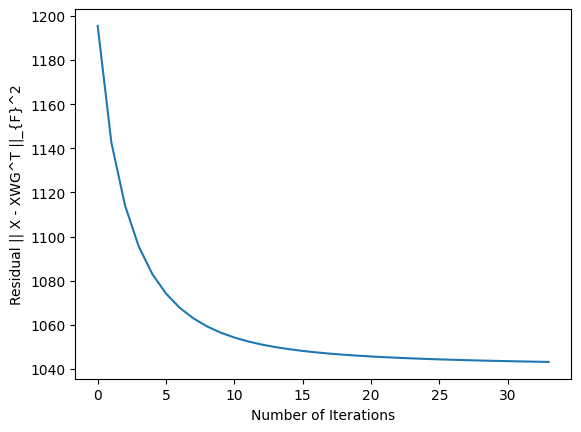

In [6]:
plt.plot(residual_vector)
plt.xlabel('Number of Iterations')
plt.ylabel('Residual || X - XWG^T ||_{F}^2')
plt.show()